In [ ]:
Libraries

In [4]:
#############importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

#########################Setting working directory
os.chdir("F:/project 2")

####################Loading data

df = pd.read_excel("Project2.xls")

In [5]:
#########################################First 5 rows of data

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
########################Data Types of all the variables

df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [7]:
##########################Number of Unique values present in each variable

df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [8]:
df.shape

(740, 21)

In [44]:
#######################From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"

continuous_vars = ["Distance from Residence to Work", "Service time", "Age", "Transportation expense",
       "Hit target", "Weight", "Height", "Body mass index", "Absenteeism time in hours", "Pet", "Son"]


categorical_vars = ["ID","Reason for absence","Month of absence","Day of the week",
                     "Seasons","Disciplinary failure", "Education", "Social drinker",
                     "Social smoker"]

In [15]:
#Creating dataframe with missing values present in each variable

missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value

missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order

missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file

missing_val.to_csv("Missing_perc.csv", index = False)

In [16]:
############################Droping observation in which "Absenteeism time in hours" has missing value

df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [17]:
df['Body mass index'].iloc[12]

31.0

In [18]:
#################create missing value

df['Body mass index'].iloc[12] = np.nan

F:\annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
##################Apply KNN imputation algorithm

df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.617
Imputing row 101/718 with 1 missing, elapsed time: 0.879
Imputing row 201/718 with 0 missing, elapsed time: 0.882
Imputing row 301/718 with 0 missing, elapsed time: 0.882
Imputing row 401/718 with 0 missing, elapsed time: 0.883
Imputing row 501/718 with 1 missing, elapsed time: 0.885
Imputing row 601/718 with 0 missing, elapsed time: 0.885
Imputing row 701/718 with 0 missing, elapsed time: 0.886


In [20]:
df['Body mass index'].iloc[12]

30.999998833986012

In [21]:
#######################Checking if all the missing value imputed

df.isnull().sum().sum()

0

Text(0,0.5,'Values')

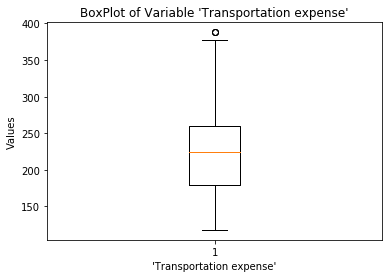

In [22]:
#######################Ploting BoxPlot of continuous variables

plt.boxplot(df['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

Text(0,0.5,'Values')

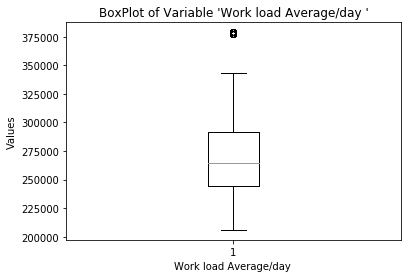

In [23]:
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0,0.5,'Values')

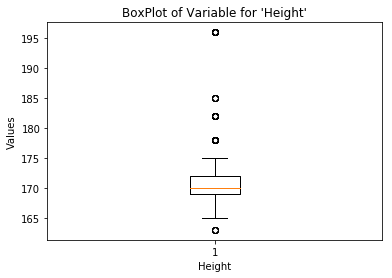

In [24]:
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0,0.5,'Values')

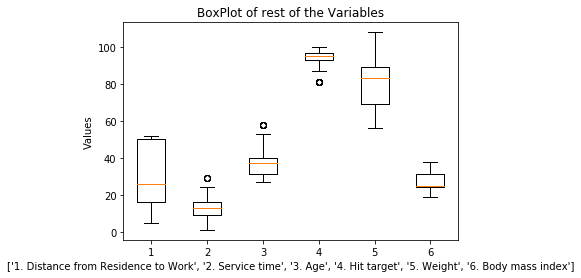

In [25]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [ ]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [45]:
################list of variables which doesn't have outlier

neglect = ["Distance from Residence to Work", "Weight", "Body mass index"]

###############ooping over all continuou variables to detect and remove Outliers

for i in continuous_vars:
    
    ###########Avoiding the variables which doesn't have outlier
    
    if i in neglect:
        continue
    
    ############Getting 75 and 25 percentile of variable "i"
    
    q75, q25 = np.percentile(df[i], [75,25])
    
    ##############Calculating Interquartile range
    
    iqr = q75 - q25
    
    ##############Calculating upper extream and lower extream
    
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    ###################Replacing all the outliers value to NA
    
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


################Imputing missing values with KNN

df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)

#################Checking if there is any missing value

df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.190
Imputing row 101/718 with 0 missing, elapsed time: 0.192
Imputing row 201/718 with 0 missing, elapsed time: 0.193
Imputing row 301/718 with 0 missing, elapsed time: 0.194
Imputing row 401/718 with 0 missing, elapsed time: 0.195
Imputing row 501/718 with 0 missing, elapsed time: 0.195
Imputing row 601/718 with 0 missing, elapsed time: 0.196
Imputing row 701/718 with 0 missing, elapsed time: 0.197


0

In [49]:
############Correlation analysis for continuous variables
###########Correlation plot

df_corr = df.loc[:,continuous_vars]

[]

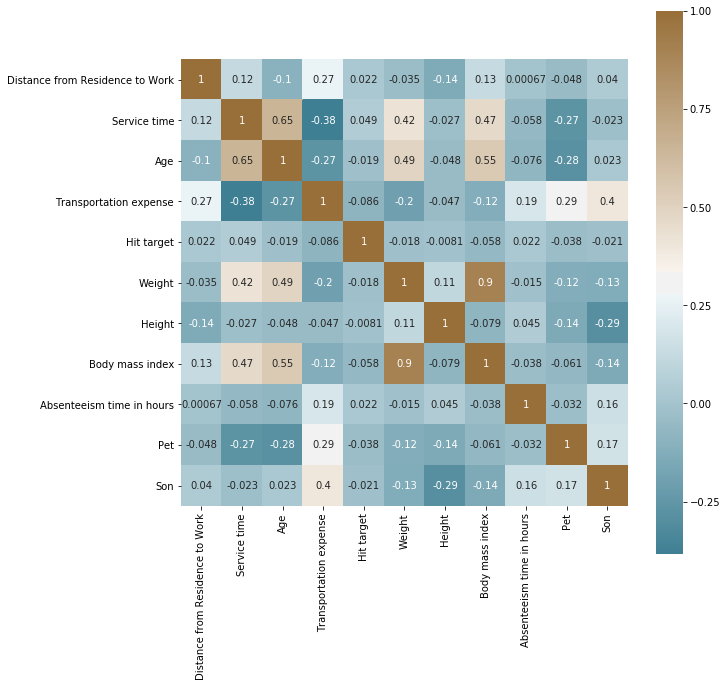

In [51]:
################Set the width and hieght of the plot

f, ax = plt.subplots(figsize=(10, 10))

##############Generate correlation matrix

corr = df_corr.corr()

##############Plot using seaborn library

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [52]:
######################Droping the variables which has redundant information

to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [53]:
##################Updating the Continuous Variables and Categorical Variables after droping some variables

continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


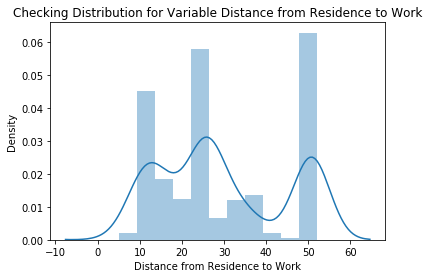

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


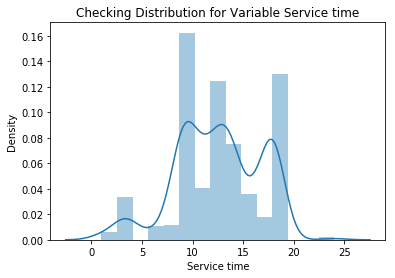

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


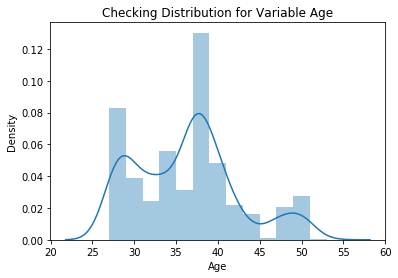

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


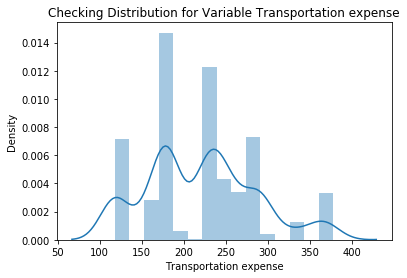

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


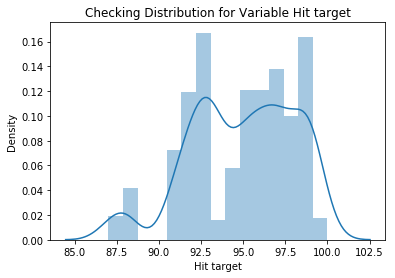

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


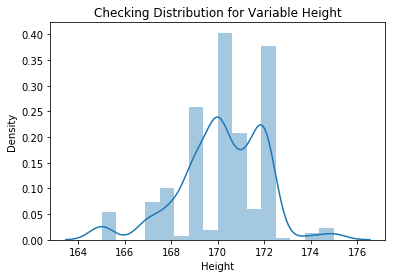

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


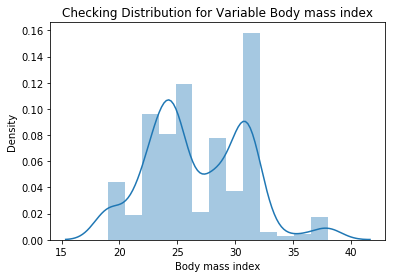

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


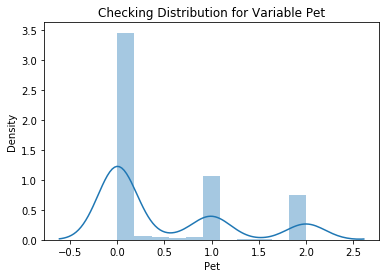

F:\annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


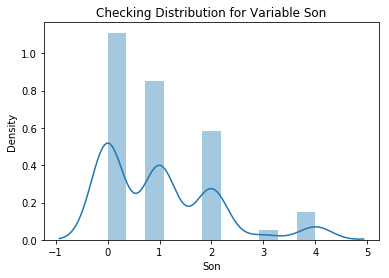

In [54]:
#######################Checking if there is any normally distributed variable in data

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [55]:
################Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
###############Normalization


for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [56]:
##################Get dummy variables for categorical variables

df = pd.get_dummies(data = df, columns = categorical_vars)

###########Copying dataframe

df1 = df.copy()

In [60]:
df.iloc[:,10].head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [61]:

df.iloc[:, df.columns != 'Absenteeism time in hours'].head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Height,Body mass index,...,Education_1.0000000613102742,Education_2.0,Education_3.0,Education_4.0,Social drinker_0.0,Social drinker_0.7174555868462206,Social drinker_0.9318242985103623,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0
0,0.657692,0.659574,0.521739,0.230769,239554.0,0.769231,0.5,0.5,0.7,0.578947,...,0,0,0,0,0,0,0,1,1,0


In [62]:
#######################Using train_test_split sampling function for test and train data split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.20)

In [63]:
###############Importing libraries for Decision Tree 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

######################Building model on top of training dataset

fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

######################Calculating RMSE for training data to check for over fitting

pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

#################Calculating RMSE for test data to check accuracy

pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.06207614788561044
Root Mean Squared Error For Test data = 0.06961711033450348
R^2 Score(coefficient of determination) = 0.8676292560216186


In [64]:
 #########################Importing libraries for Random Forest

from sklearn.ensemble import RandomForestRegressor

########################Building model on top of training dataset

fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

####################Calculating RMSE for training data to check for over fitting

pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

##########################Calculating RMSE for test data to check accuracy

pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0016631015290305066
Root Mean Squared Error For Test data = 0.003298485088892326
R^2 Score(coefficient of determination) = 0.9997028408723067


In [65]:
###########################Importing libraries for Linear Regression

from sklearn.linear_model import LinearRegression

#########################Building model on top of training dataset

fit_LR = LinearRegression().fit(X_train , y_train)

###################Calculating RMSE for training data to check for over fitting

pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

######################Calculating RMSE for test data to check accuracy

pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.2631041698504056e-12
Root Mean Squared Error For Test data = 2.379719741804226e-12
R^2 Score(coefficient of determination) = 1.0


In [66]:
##############Dimention reduction using PCA

target = df['Absenteeism time in hours']

In [67]:
df.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df.shape

(718, 116)

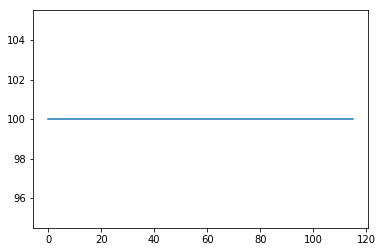

In [71]:
from sklearn.decomposition import PCA

######################33Converting data to numpy array

X = df1.values

#######################3Data has 116 variables so no of components of PCA = 116

pca = PCA(n_components=116)
pca.fit(X)

#####################The amount of variance that each PC explains

var= pca.explained_variance_ratio_

#########################Cumulative Variance explains

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [72]:
####################33From the above plot selecting 45 components since it explains almost 95+ % data variance

pca = PCA(n_components=45)

#########################3Fitting the selected components to the data

pca.fit(X)

#########################Using train_test_split sampling function for test and train data split

X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

In [73]:
#####################Importing libraries for Decision Tree 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

######################333Building model on top of training dataset

fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

######################Calculating RMSE for training data to check for over fitting

pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

#########################Calculating RMSE for test data to check accuracy

pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.5617582778529444
Root Mean Squared Error For Test data = 0.6112320718108704
R^2 Score(coefficient of determination) = 0.9523339763859806


In [74]:
##########################3Importing libraries for Random Forest

from sklearn.ensemble import RandomForestRegressor

######################Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

#######################3Calculating RMSE for training data to check for over fitting

pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

########################Calculating RMSE for test data to check accuracy

pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0338763305230946
Root Mean Squared Error For Test data = 0.06506417671425989
R^2 Score(coefficient of determination) = 0.9994598920950236


In [75]:
###########################Importing libraries for Linear Regression

from sklearn.linear_model import LinearRegression

##########################Building model on top of training dataset

fit_LR = LinearRegression().fit(X_train , y_train)

#########################Calculating RMSE for training data to check for over fitting

pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

########################Calculating RMSE for test data to check accuracy

pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))


Root Mean Squared Error For Training data = 4.331863135084232e-12
Root Mean Squared Error For Test data = 4.145920154524863e-12
R^2 Score(coefficient of determination) = 1.0
